#### Jupyter notebook for my machine learning predictive analytics classification capstone project in Python.

# Introduction

In a right heart catheterization (RHC) procedure, the doctor passes a thin tube into the right side of the patient’s heart to check conditions of heart and lungs. The procedure related risks may include bruises, excessive bleeding, and a partial collapsed lung. There are rare complications such as irregular heartbeat, low blood pressure, infection or serious lung damage.

A critically ill patient who undergoes RHC may have procedure related risks or complications. In this project, I will focus on predicting will a critically ill patient who undergoes RHC die during the procedure.

# Dataset

The data that is used in this project originally comes from the Department of Biostatistics at Vanderbilt University (http://biostat.mc.vanderbilt.edu/DataSets). The data consists of 5735 hospital admissions from critically ill patients. 2184 of them received a right heart catheterization(RHC).

# Project Definition

# Data Exploration

1) load dataset into a dataframe (df)

2) define an OUTPUT_LABEL

3) calculate the prevalence of the positive class

In [893]:
# import pandas
import pandas as pd

In [894]:
# import csv into a Pandas DataFrame
df = pd.read_csv('rhc.csv')

In [1094]:
# turn warnings off\n",
import warnings
warnings.filterwarnings('ignore')

In [895]:
# Run summary statistics
df.describe()

,Unnamed: 0,sadmdte,dschdte,dthdte,lstctdte,cardiohx,chfhx,dementhx,psychhx,chrpulhx,...,bili1,crea1,sod1,pot1,paco21,ph1,wtkilo1,adld3p,urin1,ptid
count,5735.000000,5735.000000,5734.000000,3722.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,...,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,1439.000000,2707.000000,5735.000000
mean,2868.000000,11638.686312,11660.050401,11753.869156,11781.257890,0.176635,0.178030,0.098344,0.067306,0.189887,...,2.267067,2.133017,136.768963,4.066693,38.748975,7.388413,67.827817,1.182071,2192.453665,5134.006452
std,1655.696228,513.967751,513.447322,538.812330,524.094168,0.381393,0.382571,0.297805,0.250573,0.392246,...,4.801538,2.053080,7.655160,1.028353,13.183445,0.109812,29.055534,1.819057,1525.140006,2972.206379
min,1.000000,10754.000000,10757.000000,10757.000000,10756.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.099991,0.099991,101.000000,1.099854,1.000000,6.579102,0.000000,0.000000,0.000000,5.000000
25%,1434.500000,11163.500000,11184.000000,11267.000000,11316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.799927,1.000000,132.000000,3.399902,31.000000,7.339844,56.299990,0.000000,1110.000000,2561.500000
50%,2868.000000,11759.000000,11777.000000,11831.500000,11868.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.009766,1.500000,136.000000,3.799805,37.000000,7.399998,70.000000,0.000000,1927.000000,5131.000000
75%,4301.500000,12097.000000,12120.000000,12208.000000,12244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.399902,2.399902,142.000000,4.599609,42.000000,7.459961,83.699950,2.000000,2955.000000,7689.000000
max,5735.000000,12441.000000,12560.000000,12783.000000,12644.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,58.195312,25.097656,178.000000,11.898438,156.000000,7.769531,244.000000,7.000000,9000.000000,10278.000000


In [896]:
# Check the shape of the data
df.shape

(5735, 63)

In [897]:
# Get a list of the column names
df.columns

Index(['Unnamed: 0', 'cat1', 'cat2', 'ca', 'sadmdte', 'dschdte', 'dthdte',
       'lstctdte', 'death', 'cardiohx', 'chfhx', 'dementhx', 'psychhx',
       'chrpulhx', 'renalhx', 'liverhx', 'gibledhx', 'malighx', 'immunhx',
       'transhx', 'amihx', 'age', 'sex', 'edu', 'surv2md1', 'das2d3pc',
       't3d30', 'dth30', 'aps1', 'scoma1', 'meanbp1', 'wblc1', 'hrt1', 'resp1',
       'temp1', 'pafi1', 'alb1', 'hema1', 'bili1', 'crea1', 'sod1', 'pot1',
       'paco21', 'ph1', 'swang1', 'wtkilo1', 'dnr1', 'ninsclas', 'resp',
       'card', 'neuro', 'gastr', 'renal', 'meta', 'hema', 'seps', 'trauma',
       'ortho', 'adld3p', 'urin1', 'race', 'income', 'ptid'],
      dtype='object')

In [898]:
# Return first n rows of data
df.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
3,4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


In [899]:
# Filter data on patients who received a rhc
df = df.loc[df['swang1'] == 'RHC']

In [900]:
# Return number of items in the dataframe
len(df.index)

2184

In [901]:
# Count non-NA cells for each column
df.count()

Unnamed: 0    2184
cat1          2184
cat2           512
ca            2184
sadmdte       2184
dschdte       2183
dthdte        1486
lstctdte      2184
death         2184
cardiohx      2184
chfhx         2184
dementhx      2184
psychhx       2184
chrpulhx      2184
renalhx       2184
liverhx       2184
gibledhx      2184
malighx       2184
immunhx       2184
transhx       2184
amihx         2184
age           2184
sex           2184
edu           2184
surv2md1      2184
das2d3pc      2184
t3d30         2184
dth30         2184
aps1          2184
scoma1        2184
              ... 
resp1         2184
temp1         2184
pafi1         2184
alb1          2184
hema1         2184
bili1         2184
crea1         2184
sod1          2184
pot1          2184
paco21        2184
ph1           2184
swang1        2184
wtkilo1       2184
dnr1          2184
ninsclas      2184
resp          2184
card          2184
neuro         2184
gastr         2184
renal         2184
meta          2184
hema        

In [275]:
# Count non-NA cells for each column
df.isnull().sum()

Unnamed: 0       0
cat1             0
cat2          1672
ca               0
sadmdte          0
dschdte          1
dthdte         698
lstctdte         0
death            0
cardiohx         0
chfhx            0
dementhx         0
psychhx          0
chrpulhx         0
renalhx          0
liverhx          0
gibledhx         0
malighx          0
immunhx          0
transhx          0
amihx            0
age              0
sex              0
edu              0
surv2md1         0
das2d3pc         0
t3d30            0
dth30            0
aps1             0
scoma1           0
              ... 
resp1            0
temp1            0
pafi1            0
alb1             0
hema1            0
bili1            0
crea1            0
sod1             0
pot1             0
paco21           0
ph1              0
swang1           0
wtkilo1          0
dnr1             0
ninsclas         0
resp             0
card             0
neuro            0
gastr            0
renal            0
meta             0
hema        

In [902]:
# Return number of items in the dataframe
len(df.index)

2184

In [903]:
# count the number of rows for each type
df.groupby('death').size()

death
No      698
Yes    1486
dtype: int64

Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [904]:
df['OUTPUT_LABEL'] = (df['death'] == 'Yes').astype('int')

In [905]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
1,1
2,0
4,1
9,0
11,0


Calculate the prevalence of the positive class

In [908]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [909]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.680


The prevalence of my data is 0.68. Prevalence is defined as the total number of mortality rate as compared to the total population of critically ill patients who received a rhc. Prevalence of 0.68 indicates that 68 percent of the critically ill patients who undergo RHC will die during the procedure.

Explore the columns and unique values of the dataset. 

In [910]:
print('Number of columns:', len(df.columns))

Number of columns: 64


In [911]:
df[list(df.columns)[:10]].head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0
9,10,ARF,NaN,Yes,11381,11400.0,NaN,11590,No,0
11,12,ARF,NaN,No,12174,12187.0,NaN,12414,No,0


In [912]:
df[list(df.columns)[10:20]].head()

,chfhx,dementhx,psychhx,chrpulhx,renalhx,liverhx,gibledhx,malighx,immunhx,transhx
1,1,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,1


In [285]:
df[list(df.columns[20:30])].head()

,amihx,age,sex,edu,surv2md1,das2d3pc,t3d30,dth30,aps1,scoma1
1,0,78.17896,Female,12.000000,0.755000,14.75195,30,No,50,0
2,0,46.09198,Female,14.069916,0.317000,18.13672,30,No,82,0
4,0,67.90997,Male,9.945259,0.437000,21.05078,2,Yes,72,41
9,0,48.42398,Female,11.040535,0.668945,23.25781,30,No,48,0
11,1,68.34796,Male,12.000000,0.717000,29.14844,30,No,50,0


In [286]:
df[list(df.columns[30:40])].head()

,meanbp1,wblc1,hrt1,resp1,temp1,pafi1,alb1,hema1,bili1,crea1
1,63.0,28.898438,137,38.0,38.89844,218.3125,2.599609,32.500000,0.699951,0.599976
2,57.0,0.049995,130,40.0,36.39844,275.5000,3.500000,21.097656,1.009766,2.599609
4,65.0,29.699219,125,27.0,34.79688,478.0000,3.500000,24.000000,1.009766,3.599609
9,73.0,20.597656,141,40.0,38.50000,68.0000,2.500000,32.695312,0.500000,0.500000
11,50.0,25.898438,158,10.0,35.50000,237.5000,2.299805,43.398438,0.899902,0.399963


In [287]:
df[list(df.columns[40:50])].head()

,sod1,pot1,paco21,ph1,swang1,wtkilo1,dnr1,ninsclas,resp,card
1,137,3.299805,34.0,7.329102,RHC,45.69998,No,Private & Medicare,No,No
2,146,2.899902,16.0,7.359375,RHC,0.00000,No,Private,No,Yes
4,126,5.799805,17.0,7.229492,RHC,78.39996,Yes,Medicare,No,Yes
9,146,3.099609,30.0,7.349609,RHC,43.69998,No,Medicaid,No,No
11,132,4.099609,33.0,7.369141,RHC,60.89999,No,Private & Medicare,No,Yes


In [288]:
df[list(df.columns)[50:60]].head()

,neuro,gastr,renal,meta,hema,seps,trauma,ortho,adld3p,urin1
1,No,No,No,No,No,Yes,No,No,NaN,1437.0
2,No,No,No,No,No,No,No,No,NaN,599.0
4,No,No,No,No,No,No,No,No,NaN,64.0
9,Yes,Yes,No,No,No,No,No,No,NaN,NaN
11,No,No,No,No,No,No,No,No,NaN,1701.0


In [289]:
df[list(df.columns)[60:]].head()

,race,income,ptid,OUTPUT_LABEL
1,white,Under $11k,7,1
2,white,$25-$50k,9,0
4,white,Under $11k,11,1
9,white,Under $11k,17,0
11,white,$11-$25k,21,0


In [913]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values.
    if len(n) < 30:
        print(c)
        print(n)
    else:
        print(c + ': ' + str(len(n)) + ' unique values')


Unnamed: 0: 2184 unique values
cat1
['MOSF w/Sepsis' 'MOSF w/Malignancy' 'ARF' 'CHF' 'Cirrhosis' 'COPD' 'Coma'
 'Lung Cancer' 'Colon Cancer']
cat2
[nan 'MOSF w/Sepsis' 'Coma' 'MOSF w/Malignancy' 'Colon Cancer' 'Cirrhosis'
 'Lung Cancer']
ca
['No' 'Yes' 'Metastatic']
sadmdte: 1140 unique values
dschdte: 1143 unique values
dthdte: 1018 unique values
lstctdte: 817 unique values
death
['Yes' 'No']
cardiohx
[1 0]
chfhx
[1 0]
dementhx
[0 1]
psychhx
[0 1]
chrpulhx
[0 1]
renalhx
[0 1]
liverhx
[0 1]
gibledhx
[0 1]
malighx
[0 1]
immunhx
[1 0]
transhx
[1 0]
amihx
[0 1]
age: 2046 unique values
sex
['Female' 'Male']
edu: 40 unique values
surv2md1: 1123 unique values
das2d3pc: 563 unique values
t3d30
[30  2 19 15 22  7  4 23  6 16  8  5 14 27 13 18  3  9 21 10 17 11 28 20
 25 12 24 26 29]
dth30
['No' 'Yes']
aps1: 111 unique values
scoma1
[  0  41   9  26  37  44  55 100  61  89  94]
meanbp1: 151 unique values
wblc1: 422 unique values
hrt1: 159 unique values
resp1: 66 unique values
temp1: 105 unique 

Observations of the dataset

From analysis of the columns, we can see that they are a mix of categorical (non-numeric) and numerical data. A few things to point out,

dthdte: Date of Death. We will exclude it as it is related to the output label.

sadmdte, dschdte, lstctdte - are categorical and have a lot of values. We can create a new column, days of hospitalization, by subtracting study admission date (sadmdte) from the hospital discharge date (dschdte). We will not use date of last contact (lstctdte) as part of this project.

t3d30: It measures time to death. min{dthdte - sadmdte, 30}. We will exclude it as it is related to the output
       label.

age: To convert this numerical variable to ordinal variable with numerical value, we will place each patient's age into different age ranges acoordingly then assign an age id to each age range.

income: Ordinal variable. We will assign an income id to each income range to get the numerical value.

ptid: Patient ID. Identifier and not a useful variable.

# Feature Engineering

Feature engineering uses the input data to create model features which will be used to 
train the model.

## Numerical Features

Create a new column to calculate days of hospitalization by subtracting the admission date (sadmdte) from the discharge date (dschdte).

In [914]:
# calculate days_hospitalization if there is value in admission date column
if df['sadmdte'].isnull().all() != True:
    df['days_hospitalization'] = (df['dschdte'] - df['sadmdte'])

In [915]:
# check for negative value in days_hospitalization
(df['days_hospitalization'] < 0).unique()

array([False])

The columns that are numerical that we will use are shown below

In [916]:
cols_num = ['alb1', 'aps1', 'bili1', 'crea1', 'das2d3pc','hema1', 'hrt1', 'meanbp1', 'paco21', 'pafi1', 'ph1',
            'pot1', 'resp1', 'scoma1', 'sod1', 'surv2md1', 'temp1', 'urin1', 'wblc1','wtkilo1', 
            'amihx', 'cardiohx', 'chfhx', 'chrpulhx', 'dementhx', 'gibledhx', 'immunhx', 'liverhx',  'malighx',  
            'psychhx', 'renalhx', 'transhx', 'days_hospitalization', 'edu']

In [ ]:
# 34 numerical variables
alb1: Albumin Day 1. A protein made by the liver. Normal range: 3.4 to 5.4 g/dL.
aps1: Acute Physiology Score III ignoring Coma day 1. It measures severity of patient’s illness and estimates
      the probability of mortality.
bili1: Bilirubin day 1. It measures level of bilirubin in the blood to detect anemia or liver disease. 
       Normal level: < 0.3 mg/dL.
crea1: Serum creatinine day 1. It measures level of creatinine (waste product) in the 
       blood. Normal range: men (0.6 to 1.2 mg/dl),  women (0.5 and 1.1 mg/dl)
das2d3pc: DASI (Duke Activity Status Index). It measures a patient's functional capacity.
hema1: Hematocrit day 1. It measures amount of red blood cell. Normal range: men(45% to 52%), women(37% to 48%).
hrt1: Heart rate day 1
meanbp1: Mean Blood Pressure day 1. Normal range: 70 to 100 mmHg.
paco21: Partial pressure of carbon dioxide day 1. It measures level of carbon dioxide in the blood.
pafi1: Carrico index day 1. It measures hypoxemia (abnormally low level of oxygen in the blood).
ph1: Arterial blood gas day 1. It measures level of ph. Normal range: 7.35 to 7.45.
pot1: Serum potassium day 1. Normal range: 3.5 to 5.5 mEq/L.
resp1: Respiration rate day 1. Number of breaths per minute. Normal range: 12 to 20 breaths per minute.
scoma1: Glasgow Coma Score day 1. It measures the level of consciousness in patients.
sod1: Serum sodium day 1. It is to identify abnormal level of sodium in the blood.
surv2md1: 2M model survival prediction at day 1. Support model estimate of the probability of surviving 2 months  
temp1: Temperature (Celsius) day 1
urin1: Urine Output Day 1
wblc1: White blood cell count day 1. 
wtkilo1: Weight in kilograms
    
amihx: Acute/ Definite Myocardial Infarction (heart attack)    
cardiohx: Acute Myocardial infarction (MI)/ heart attack, Peripheral Vascular Disease,
          Cardiovascular Symptoms
chfhx: Congestive Heart Failure
chrpulhx: Chronic Pulmonary Disease (lung disease)
dementhx: Dementia, Stroke, Parkinson’s Disease
gibledhx: Upper gastrointestinal (GI) Bleeding
immunhx: Immunosupperssion (suppression of immune system), Organ Transplant, HIV Positivity, Diabetes Mellitus
malighx: Solid Tumor, Metastatic Disease, Leukemia, Lymphoma
liverhx: Cirrhosis (liver damage), Hepatic Failure (liver failure)
psychhx: Psychiatric History, Active Psychosis or Severe Depression
renalhx: Chronic Renal Disease (kidney failure), Chronic Hemodialysis or Peritoneal Dialysis    
transhx: Transfer (> 24 Hours) from another hospital
    
days_hospitalization: Days of hospitalization (discharge date - admission date).
edu: Years of Education         

## Categorical Features

Categorical variables are non-numeric data. The columns that are categorial are shown below

In [917]:
cols_cat =['cat1', 'cat2', 'ca', 'ninsclas', 'sex']

In [ ]:
# 5 categorical variables
cat1: Primary disease category
cat2: Secondary disease category
ca: Cancer   
ninsclas: Types of insurance  
sex

Check for missing data

In [918]:
df[cols_cat].isnull().sum()

cat1           0
cat2        1672
ca             0
ninsclas       0
sex            0
dtype: int64

cat2 has missing data. We add another categorical type for unknown using the fillna 
function.

In [919]:
df['cat2'] = df['cat2'].fillna('UNK')

### One-hot encoding

We use One-hot encoding to convert categorical data to numerical data. In One-hot encoding, we create new columns (binary/dummy variables) based on number of unique integer value. The value of 1 is placed in the binary variable column if it contains unique value and 0 otherwise.

In [920]:
df.cat1.head()

1         MOSF w/Sepsis
2     MOSF w/Malignancy
4         MOSF w/Sepsis
9                   ARF
11                  ARF
Name: cat1, dtype: object

In [921]:
pd.get_dummies(df['cat1'], prefix = 'cat1').head()

,cat1_ARF,cat1_CHF,cat1_COPD,cat1_Cirrhosis,cat1_Colon Cancer,cat1_Coma,cat1_Lung Cancer,cat1_MOSF w/Malignancy,cat1_MOSF w/Sepsis
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0


We use the drop_first option to drop the first categorical value.

In [922]:
pd.get_dummies(df['cat1'], prefix = 'cat1', drop_first = True).head()

,cat1_CHF,cat1_COPD,cat1_Cirrhosis,cat1_Colon Cancer,cat1_Coma,cat1_Lung Cancer,cat1_MOSF w/Malignancy,cat1_MOSF w/Sepsis
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0


We make all of our categorical features

In [923]:
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [924]:
df_cat.head()

,cat1_CHF,cat1_COPD,cat1_Cirrhosis,cat1_Colon Cancer,cat1_Coma,cat1_Lung Cancer,cat1_MOSF w/Malignancy,cat1_MOSF w/Sepsis,cat2_Colon Cancer,cat2_Coma,...,cat2_MOSF w/Sepsis,cat2_UNK,ca_No,ca_Yes,ninsclas_Medicare,ninsclas_Medicare & Medicaid,ninsclas_No insurance,ninsclas_Private,ninsclas_Private & Medicare,sex_Male
1,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1


We use concat function to add the one-hot encoding columns to the dataframe 
Set axis = 1 to indicate add the columns.

In [925]:
df = pd.concat([df, df_cat], axis = 1)

Save the column names of the categorical data.

In [926]:
cols_all_cat = list(df_cat.columns)

## Ordinal Features

The last two columns we use to make features are age and income

In [927]:
df[list(df.columns[20:30])].head()

,amihx,age,sex,edu,surv2md1,das2d3pc,t3d30,dth30,aps1,scoma1
1,0,78.17896,Female,12.000000,0.755000,14.75195,30,No,50,0
2,0,46.09198,Female,14.069916,0.317000,18.13672,30,No,82,0
4,0,67.90997,Male,9.945259,0.437000,21.05078,2,Yes,72,41
9,0,48.42398,Female,11.040535,0.668945,23.25781,30,No,48,0
11,1,68.34796,Male,12.000000,0.717000,29.14844,30,No,50,0


Group age by age ranges

In [928]:
# create bins and labels for age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90',
          '90-100', '100-110']

# put age into different age ranges
df['age_range'] = pd.cut(df['age'], bins = bins, labels = labels, include_lowest = True)

In [929]:
df.head(5)

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,cat2_UNK,ca_No,ca_Yes,ninsclas_Medicare,ninsclas_Medicare & Medicaid,ninsclas_No insurance,ninsclas_Private,ninsclas_Private & Medicare,sex_Male,age_range
1,2,MOSF w/Sepsis,UNK,No,11799,11844.0,11844.0,11844,Yes,1,...,1,1,0,0,0,0,0,1,0,70-80
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,0,0,1,0,0,0,1,0,0,40-50
4,5,MOSF w/Sepsis,UNK,No,12035,12037.0,12037.0,12036,Yes,0,...,1,1,0,1,0,0,0,0,1,60-70
9,10,ARF,UNK,Yes,11381,11400.0,NaN,11590,No,0,...,1,0,1,0,0,0,0,0,0,40-50
11,12,ARF,UNK,No,12174,12187.0,NaN,12414,No,0,...,1,1,0,0,0,0,0,1,1,60-70


In [930]:
# check the size of different age ranges
df.groupby('age_range').size()

age_range
0-10         0
10-20        8
20-30       96
30-40      153
40-50      283
50-60      371
60-70      577
70-80      529
80-90      153
90-100      13
100-110      1
dtype: int64

Map age_range to 0-10 for the numerical data

In [931]:
# create age id by mapping age ranges to 0-10
age_id = {'0-10': 0,
          '10-20': 1,
          '20-30': 2,
          '30-40': 3,
          '40-50': 4,
          '50-60': 5,
          '60-70': 6,
          '70-80': 7,
          '80-90': 8,
          '90-100': 9,
          '100-110': 10}

# replace age ranges with age id and save as age group
df['age_group'] = df.age_range.replace(age_id)

In [114]:
df.head(5)

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,cat2_MOSF w/Sepsis,cat2_UNK,ca_No,ca_Yes,ninsclas_Medicare,ninsclas_Medicare & Medicaid,ninsclas_No insurance,ninsclas_Private,ninsclas_Private & Medicare,sex_Male
1,2,MOSF w/Sepsis,UNK,No,11799,11844.0,11844.0,11844,Yes,1,...,0,1,1,0,0,0,0,0,1,0
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,1,0,0,1,0,0,0,1,0,0
4,5,MOSF w/Sepsis,UNK,No,12035,12037.0,12037.0,12036,Yes,0,...,0,1,1,0,1,0,0,0,0,1
9,10,ARF,UNK,Yes,11381,11400.0,NaN,11590,No,0,...,0,1,0,1,0,0,0,0,0,0
11,12,ARF,UNK,No,12174,12187.0,NaN,12414,No,0,...,0,1,1,0,0,0,0,0,1,1


In [932]:
# check income column
df[['income']].head()

,income
1,Under $11k
2,$25-$50k
4,Under $11k
9,Under $11k
11,$11-$25k


In [933]:
# check the size of income ranges
df.groupby('income').size()

income
$11-$25k       452
$25-$50k       393
> $50k         194
Under $11k    1145
dtype: int64

Map income to 0-3 for the numerical data.

In [934]:
# create income id by mapping income to 0-10
income_id = {'$11-$25k' : 0,
             '$25-$50k' : 1,
             '> $50k' : 2,
             'Under $11k' : 3}

# replace income with income id and save as income group
df['income_group'] = df.income.replace(income_id)

In [935]:
cols_extra = ['age_group','income_group']

## Engineering Features Summary

In [936]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra ))
print('Numerical Features:', len(cols_num))
print('Categorical Features:', len(cols_all_cat))
print('Extra Features:', len(cols_extra))

Total number of features: 58
Numerical Features: 34
Categorical Features: 22
Extra Features: 2


Check for missing data

In [937]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

urin1                   1081
days_hospitalization       1
income_group               0
sod1                       0
gibledhx                   0
dementhx                   0
chrpulhx                   0
chfhx                      0
cardiohx                   0
amihx                      0
dtype: int64

Make a new dataframe that only has the columns of interest.  Double check that the columns used to define the OUTPUT_LABEL are not part of cols_input.

In [938]:
cols_input = cols_num + cols_all_cat + cols_extra
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [939]:
# Check the number of cols_input
len(cols_input)

58

In [940]:
# Check the shape of df_data
df_data.shape

(2184, 59)

In [941]:
# Check index is unique
df_data.index.is_unique

True

In [942]:
# Check for duplicated columns
cc = list(df_data.columns)
set([x for x in cc if cc.count(x) > 1])

set()

# Building Training/Validation/Test Samples

Training samples: The sample of data which are used to train the model to learn the data. 
Validation samples: The sample of data which are used to evaluate how well the model has                     been trained and to adjust model properties.
Test samples: The sample of data which are used to evaluate the final model after                       training to estimate how well it performs.

Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

Step 1: Shuffle the sample

In [961]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

Step 2: Use sample again to extract 30% of the data for validation / test splits.

In [962]:
# save 30% of the data as validation and test data
df_valid_test = df_data.sample(frac = 0.30, random_state = 42) 
print('Split size: %.3f'%(len(df_valid_test) / len(df_data)))

Split size: 0.300


Step 3: Split validation and test data into test and validation using 50% fraction.

In [963]:
# split into test data and exclude them from validation and test data
df_test = df_valid_test.sample(frac = 0.50, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Step 4: Exclude validation and test data from df_data to obtain training data

In [964]:
# use the rest of the data as training data
df_train_all = df_data.drop(df_valid_test.index)

In [965]:
df_train_all.shape

(1529, 59)

Check what percent of our groups are dead during the procedure. This is known as 
prevalence. Ideally, all three groups would have similar prevalance.

In [966]:
# check the prevalence of each group
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))


Test prevalence(n = 328):0.668
Valid prevalence(n = 327):0.697
Train all prevalence(n = 1529):0.680


To verify that we used all the data

In [967]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 2184)


Take the df_train_all and create a balanced dataset. Reasons why we need to balance and a few techniques for balancing the dataset: 

We will have an imbalanced dataset when the number of observations in one class is 
significantly lower or higher than the other class. For example, if there are more 
positives than negatives, the model might treat all samples as positive.

There are three ways to balance the dataset:
(1) under-sample the more dominant class: use a random subset of the positives to reduce
                                          the frequency of the majority class.
(2) over-sample the imbalanced class: replicate the negative samples a few times to 
                                      increase the frequency of the minority class.
(3) produce synthetic negative data: use exact replica of negative samples and add to the 
                                     main dataset.

In [968]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_neg, df_train_pos.sample(n = len(df_train_neg), random_state = 42)], axis = 0)

# shuffle the order of training samples
df_train = df_train.sample(n=len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 980):0.500


Save all 4 dataframes to csv and the cols_input

In [969]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [970]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Fill any missing values with the mean value

In [971]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

Calculate the mean value from the training data.

In [1096]:
df_mean = df_train_all[cols_input].mean(axis = 0)

# save the means
df_mean.to_csv('df_mean.csv',index = True)

In [973]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,alb1,2.984792
1,aps1,60.221714
2,bili1,2.686094
3,crea1,2.452263
4,das2d3pc,20.754376


In [974]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

Create an input matrix X and output vector y

In [975]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (1529, 58)
Training shapes: (980, 58) (980,)
Validation shapes: (327, 58) (327,)


Create a scalar, save it, and scale the X matrices

In [976]:
# use scikit learn's Standard Scaler to remove the mean and scales to unit variance 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

We will need this scaler for the test data, so we save it using a package called pickle.

In [977]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [978]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [979]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

In [980]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [981]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

K nearest neighbors algorithm uses information about a new sample's k nearest neighbors to classify the new sample. It assumes that similar data points which belong to the same class are close to each other. k is a variable which refers to the number of nearest neighbors.

Train a KNN and evaluate performance

In [982]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [983]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


KNN
Training:
AUC:0.760
accuracy:0.654
recall:0.420
precision:0.789
specificity:0.871
prevalence:0.500
 
Validation:
AUC:0.730
accuracy:0.560
recall:0.425
precision:0.882
specificity:0.859
prevalence:0.697
 


First model did well. We have an AUC of 0.73 that catches 43 percent of the death rate when we use a threshold of 0.5.

### Logistic Regression

Unlike Linear Regression, Logistic Regression does not require a linear relationship between the dependent and independent variables. Logistic Regression uses the output (weighted sum) of a linear function and apply sigmoid function to compute the conditional probabilities of the predicted outcome. To find estimated weights when making predictions, we maximize the log likelihood function. Likelihood is the conditional probability of obtaining observed values. We minimize log loss function to increase the maximum likelihood. Gradient Descent is used to adjust the weight in order to find the global minimum.

Train a logistic regression and evaluate the performance

In [1095]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [985]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.801
accuracy:0.720
recall:0.680
precision:0.740
specificity:0.761
prevalence:0.500
 
Validation:
AUC:0.766
accuracy:0.679
recall:0.671
precision:0.836
specificity:0.697
prevalence:0.697
 


### Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) calculates the gradient (minimum of a function) for each step by using a random sample data point at one time then moves forward and repeat the steps. SGD is faster than Linear Regression which uses gradient descent because SGD updates a single data point instead of all data points in one iteration.

Train a stochastic gradient descent model and evaluate the performance

In [1097]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log', alpha = 0.1, random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [987]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.792
accuracy:0.706
recall:0.678
precision:0.719
specificity:0.735
prevalence:0.500
 
Validation:
AUC:0.768
accuracy:0.697
recall:0.702
precision:0.838
specificity:0.687
prevalence:0.697
 


### Naive Bayes

Naive Bayes uses the algorithms based on Bayes Theorem to compute the probabilities for all classes and picked the outcome with the highest probability. It assumes input features are independent.

Train naive bayes model and evaluate the performance

In [988]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [989]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.746
accuracy:0.599
recall:0.235
precision:0.865
specificity:0.963
prevalence:0.500
 
Validation:
AUC:0.702
accuracy:0.443
recall:0.232
precision:0.883
specificity:0.929
prevalence:0.697
 


### Decision Tree Classifier

Decision Tree divides the dataset into smaller subsets based on conditions. It has a upside down tree structure and starts at the top decision node called root node. Each internal node corresponds to a input feature. Each branch is a decision and each leaf node is an outcome.

Train decision tree model and evaluate the performance

In [990]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [991]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


Decision Tree
Training:
AUC:0.983
accuracy:0.928
recall:0.945
precision:0.913
specificity:0.910
prevalence:0.500
 
Validation:
AUC:0.665
accuracy:0.645
recall:0.675
precision:0.786
specificity:0.576
prevalence:0.697
 


### Random Forest

Random forest creates and combines multiple decision trees for a more accurate prediction. Each decision tree in the forest corresponds to randomly selected features so it is independent of each other.

Train random forest model and evaluate the performance

In [1098]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [993]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


Random Forest
Training:
AUC:0.913
accuracy:0.828
recall:0.782
precision:0.861
specificity:0.873
prevalence:0.500
 
Validation:
AUC:0.768
accuracy:0.694
recall:0.689
precision:0.844
specificity:0.707
prevalence:0.697
 


### Gradient Boosting Classifier

Gradient Boosting Classifier creates a new decision tree one at a time by learning and correcting mistakes from the previous tree.

Train gradient boosting model and evaluate the performance

In [994]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [995]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.743
accuracy:0.676
recall:0.715
precision:0.799
specificity:0.586
prevalence:0.697
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [996]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [997]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

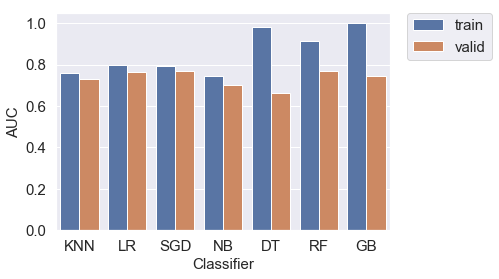

In [998]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

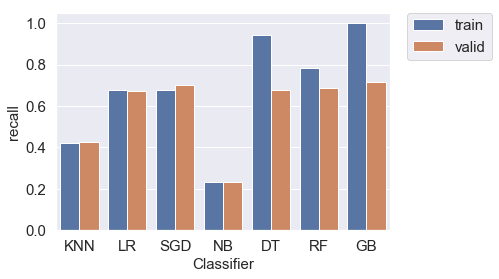

In [999]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

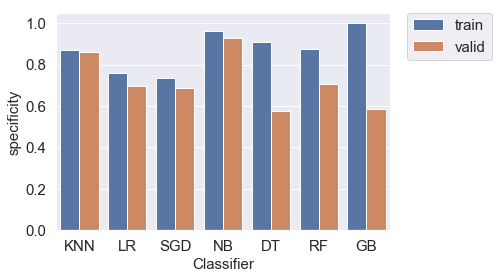

In [1000]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

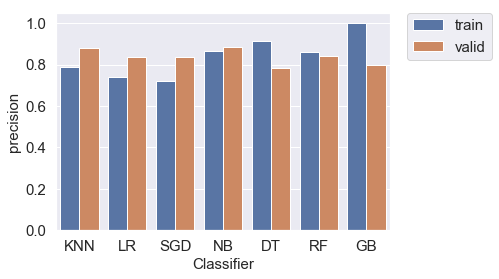

In [1001]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

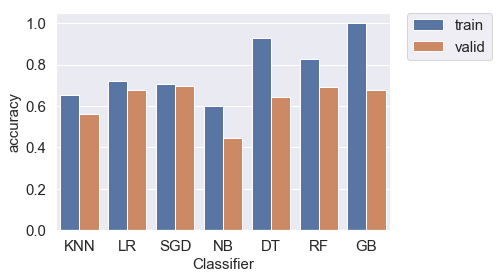

In [1002]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

Pick one performance metric that we will use for picking the best model. Explain the choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance. 

Summary of Baseline Models' Performance

Stochastic gradient descent (SGD) is the best model because it has the highest Area under the ROC curve (AUC) of 0.77 in validation data set among all models. SGD has less overfitting. It has the closest Training versus Validation scores.

In [1003]:
df_results_sgdc = pd.DataFrame({'classifier1':['SGD','SGD'],
                                'data_set':['train','valid']*1,
                                'auc1':[sgdc_train_auc,sgdc_valid_auc,],
                                'accuracy1':[sgdc_train_accuracy,sgdc_valid_accuracy,],
                                'recall1':[sgdc_train_recall,sgdc_valid_recall,],
                                'precision1':[sgdc_train_precision,sgdc_valid_precision,],
                                'specificity1':[sgdc_train_specificity,sgdc_valid_specificity,],})

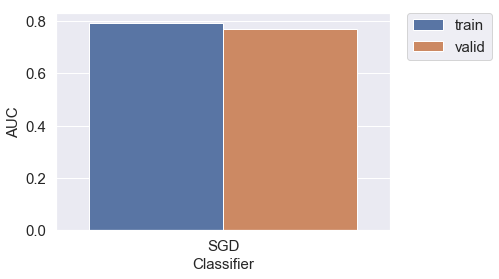

In [1004]:
# Bar plot of SGD's AUC
ax = sns.barplot(x="classifier1", y="auc1", hue="data_set", data=df_results_sgdc)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Learning Curves

Using our baseline model that has the best performance on the validation set, plot a learning curve for that model. 

In [1005]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

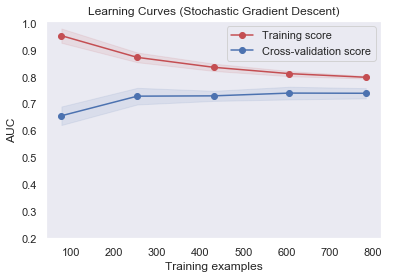

In [1006]:
# learning curves of SGD
from sklearn.linear_model import SGDClassifier
title = "Learning Curves (Stochastic Gradient Descent)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = SGDClassifier(loss = 'log', alpha = 0.1, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

Identify if our model has high variance or high bias. Describe techniques which could be used to improve performance of that model.  

From the learning curves, we can tell that this SGD model has high variance (overfitting) as the learning curves converge to a low score. One possible cause of overfitting could be due to the model is too complex. To reduce variance (noise), we could increase sample data, increase regularization, decrease number of input features, introduce better features, simplify the model, or use architectures with better generalization.

## Feature Importance

Plot the feature importance for logistic regression and random forest models here. 

#### Feature Importance: logistic regression

In [1099]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Observations we have of the feature importances. 

In [1082]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                   columns=['importance']).sort_values('importance', ascending = False)


In [1083]:
feature_importances.head()

,importance
cat1_MOSF w/Malignancy,0.372340
ninsclas_Medicare,0.345801
chfhx,0.304417
dementhx,0.231994
bili1,0.215780


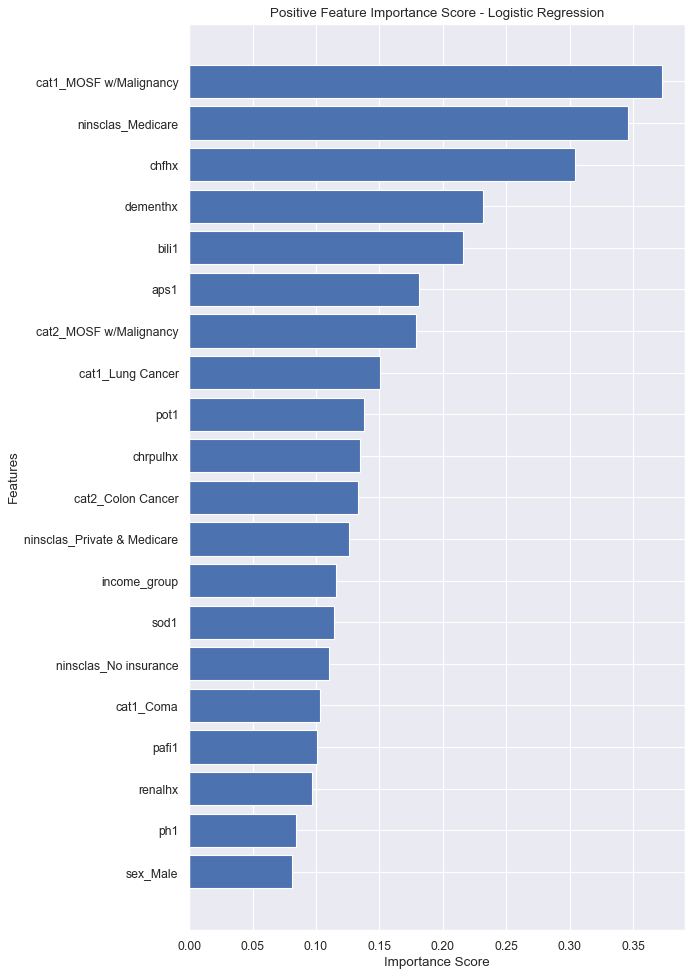

In [1084]:
# Top Positive feature importance for logistic regression
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

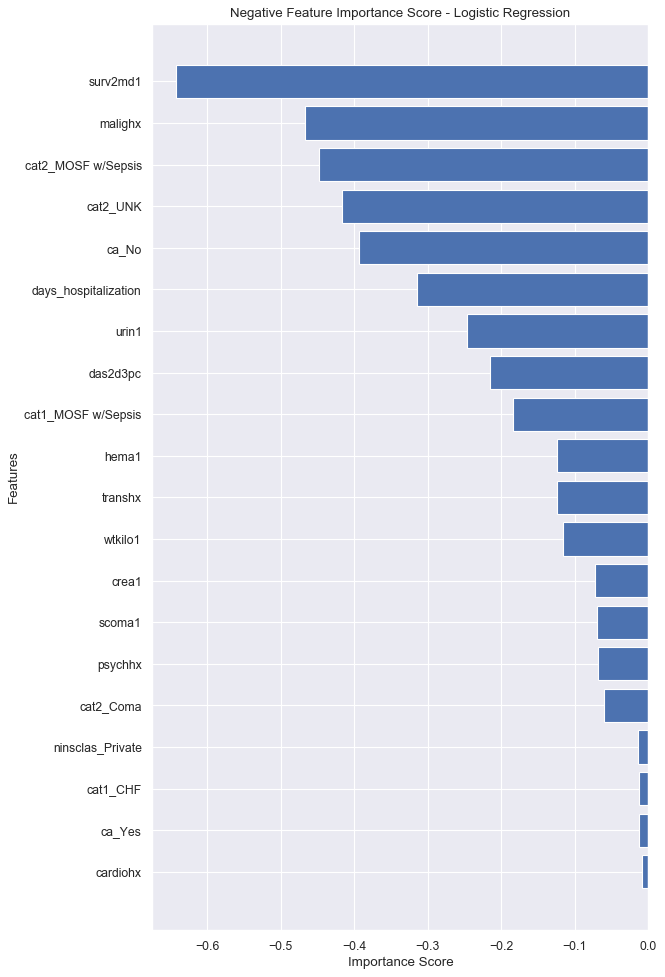

In [1085]:
# Top Negative feature importance for logistic regression
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

#### Model Selection: random forest

In [1100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1087]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance', ascending = False)
feature_importances.head()

,importance
surv2md1,0.158731
das2d3pc,0.097478
days_hospitalization,0.097216
aps1,0.058470
wblc1,0.047779


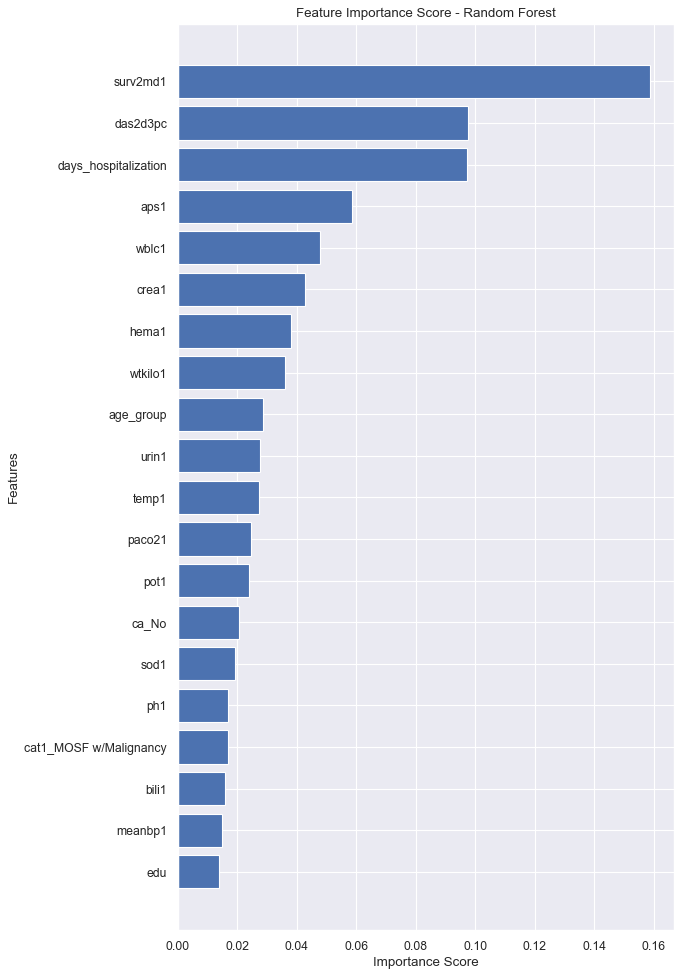

In [1088]:
# Top feature importance for random forest
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

For logistic regression, the variables with highest positive coefficients are predictive of multi-organ system failure (MOSF) with malignancy (cancerous) and the variables with highest negative coefficients are predictive of surviving 2 months at day 1.

As for random forest, the variables with highest positive coefficients are predictive of surviving 2 months at day 1. Top 10 most important variables for random forest are numerical variables except one categorical variable, age group.

For logistic regression, MOSF with malignancy is the most important feature and it makes sense as the patient with multiple organ failure and cancerous cells will have higher risk during medical procedure.

To reduce overfitting due to high variance, we can look at top positive and top negative features of the logistic regression and top features of the random forest then decrease the number of variables accordingly. In this case, we have to take note of the top negative feature, estimate of the probability of surviving 2 months at day 1. This top negative feature is also the top positive feature of random forest. We could try to remove the top second negative feature, malighx (Solid Tumor, Metastatic Disease, Leukemia) as it is not the top positive feature of the random forest.

Lastly, classifying numerical columns as categorical columns could cause value error in generating feature importance. Professor Long helped me to catch the error. 

## Hyperparameter tuning

Using our best baseline model, pick a hyperparameter and show its effect for a range of values.

We look at the effect of a single parameter for Stochastic gradient descent: alpha. Alpha is called learning rate or step size. It is the size of the steps or the portion that weights are updated when we train the model. When the alpha is too small, running time will be slow because it takes long time to reach global minimum (the smallest value in the loss function). When the alpha is too big, it might miss the global minimum.

In [1101]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [1102]:
# Use Stochastic gradient descent as the best baseline model, pick a hyperparameter and show its effect
# for a range of values. Store the auc for the training and validation set.

alphas = [0.001,0.003, 0.01, 0.03, 0.1,0.3, 0.5]

train_aucs = np.zeros(len(alphas))
valid_aucs = np.zeros(len(alphas))

for ii in range(len(alphas)):
    alpha = alphas[ii]    
    
    # fit model    
    sgdc=SGDClassifier(loss = 'log',alpha = alpha, random_state = 42)
    sgdc.fit(X_train_tf, y_train)
    
    # get predictions
    y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
    y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid

Plot the results

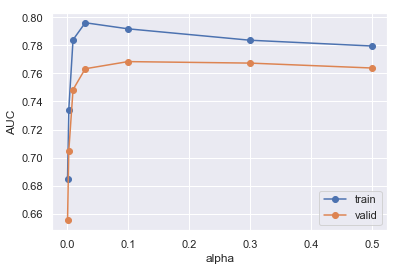

In [1023]:
import matplotlib.pyplot as plt

plt.plot(alphas, train_aucs,'o-',label = 'train')
plt.plot(alphas, valid_aucs,'o-',label = 'valid')

plt.xlabel('alpha')
plt.ylabel('AUC')
plt.legend()
plt.show()

As we increase the alpha from 0.001 to 0.03, we get improved AUC in both the training and validation performance. However, the performance decreases after the alpha of 0.1.

Using RandomizedSearchCV, optimize a few of our baseline models. 
(Note that GradientBoosting Classifier may take a while so we might need to adjust the number of iterations or specific parameters. If this takes too long on the computer, feel free to take that one out.) 

#### Optimized RandomForestClassifier

In [1024]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [1025]:
# create a grid over a few of those
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)

# maximum number of features to use at each split
max_features = ['auto','sqrt']

# maximum depth of the tree
max_depth = range(2,20,2)

# minimum number of samples to split a node
min_samples_split = range(2,10,2)

# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'criterion':criterion} 

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [1026]:
# Use auc to evaluate a set of hyperparameters in RandomizedSearchCV function.
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [1059]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring, verbose = 1, random_state = 42)

In [1111]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   49.8s finished


51.22553324699402


In [1061]:
# check the best parameters for Random Forest
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

We analyze the performance of the best model compared to the baseline model.

In [1104]:
# analyze the performance of the Optimized Random Forest model compared to its baseline model
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))


Baseline Random Forest
Training AUC:0.913
Validation AUC:0.768
Optimized Random Forest
Training AUC:1.000
Validation AUC:0.798


In this case, we get a boost of 0.03 on the Validation AUC. 

#### Optimized SGDClassifier

In [1105]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [1106]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3,0.5]
random_grid_sgdc = {'penalty':penalty,
                    'max_iter':max_iter,
                    'alpha':alpha}

# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2,
                                 scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

5.531535863876343


In [1057]:
# check the best parameters for SGD
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 800, 'alpha': 0.03}

In [1058]:
# analyze the performance of the Optimized SGD model compared to its baseline model
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.792
Validation AUC:0.768
Optimized sgdc
Training AUC:0.770
Validation AUC:0.776


In this case, we get a boost of 0.01 on the Validation AUC.

#### Optimize Gradient Boosting Tree Classifier

In [1064]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [1065]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid
random_grid_gbc = {'n_estimators':n_estimators,
                   'max_depth':max_depth,
                   'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, 
                                scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

8.220441818237305


In [1066]:
# check the best parameters for GB
gbc_random.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [1067]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:1.000
Validation AUC:0.743
Optimized gbc
Training AUC:0.936
Validation AUC:0.795


In this case, we get a boost of 0.05 on the Validation AUC.

#### Optimize Logistic Regression Classifier

In [1107]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1108]:
penalty = ['l2','l1']
max_iter = range(200,1000,200)
C = [0.1, 0.3, 0.5, 1, 1.5, 2]
random_grid_lr = {'penalty':penalty,
                  'max_iter':max_iter,
                  'C':C}

# create the randomized search cross-validation
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid_lr, n_iter = 20, cv = 2,
                               scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
lr_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.6027679443359375


In [1045]:
# check the best parameters for LR
lr_random.best_params_

{'penalty': 'l1', 'max_iter': 400, 'C': 0.5}

In [1046]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline lr')
lr_train_base_auc = roc_auc_score(y_train, y_train_preds)
lr_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(lr_train_base_auc))
print('Validation AUC:%.3f'%(lr_valid_base_auc))
print('Optimized lr')
y_train_preds_random = lr_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = lr_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
lr_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
lr_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(lr_train_opt_auc))
print('Validation AUC:%.3f'%(lr_valid_opt_auc))

Baseline lr
Training AUC:0.801
Validation AUC:0.766
Optimized lr
Training AUC:0.799
Validation AUC:0.770


In this case, we get a boost of 0.004 on the Validation AUC.

#### Model Selection: analyze optimization results

In [1068]:
# analyze the results of the 4 optimizations.
df_opt_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB', 'LR', 'LR'],
                               'data_set':['baseline','optimized']*4,
                               'auc':[sgdc_valid_base_auc, sgdc_valid_opt_auc,
                                      rf_valid_base_auc, rf_valid_opt_auc,
                                      gbc_valid_base_auc, gbc_valid_opt_auc,
                                      lr_valid_base_auc, lr_valid_opt_auc],
                           })

In [1069]:
df_opt_results

,classifier,data_set,auc
0,SGD,baseline,0.768430
1,SGD,optimized,0.776050
2,RF,baseline,0.767544
3,RF,optimized,0.798777
4,GB,baseline,0.743044
5,GB,optimized,0.794746
6,LR,baseline,0.765905
7,LR,optimized,0.770069


Make a plot comparing the performance of the optimized models to the baseline models. 

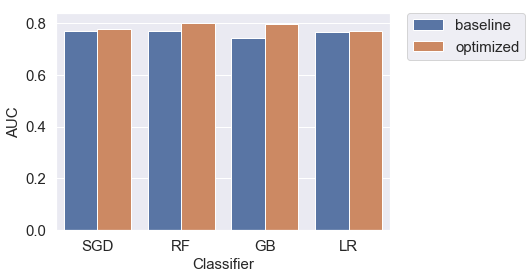

In [1070]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_opt_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

We choose optimized Stochastic Gradient Descent as the best model because it has the closest Training versus Validation scores and its performance is about the same as the random forest, gradient boosting and logistis regression classifier.

In [1071]:
pickle.dump(sgdc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.

In [1072]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [1073]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [1074]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [1075]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Calculate prediction probabilities

In [1076]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Evaluate the Performance

In [1077]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.770
accuracy:0.691
recall:0.667
precision:0.700
specificity:0.714
prevalence:0.500
 
Validation:
AUC:0.776
accuracy:0.716
recall:0.706
precision:0.861
specificity:0.737
prevalence:0.697
 
Test:
AUC:0.749
accuracy:0.683
recall:0.689
precision:0.807
specificity:0.670
prevalence:0.668
 


Plot the performance of the best model on the training, validation and test sets

In [1078]:
df_perf = pd.DataFrame({'score':['AUC','AUC','AUC','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall',
                                 'Precision','Precision','Precision','Specificity', 'Specificity', 'Specificity'],
                        'dataset':['Training','Validation','Test']*5,
                        'performance':[train_auc, valid_auc, test_auc,
                                       train_accuracy, valid_accuracy, test_accuracy,
                                       train_recall, valid_recall, test_recall,
                                       train_precision, valid_precision, test_precision,
                                       train_specificity, valid_specificity, test_specificity],        
                          })

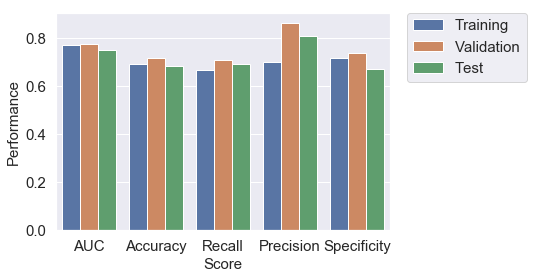

In [1079]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="score", y="performance", hue="dataset", data=df_perf)
ax.set_xlabel('Score',fontsize = 15)
ax.set_ylabel('Performance', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

Plot the ROC curve

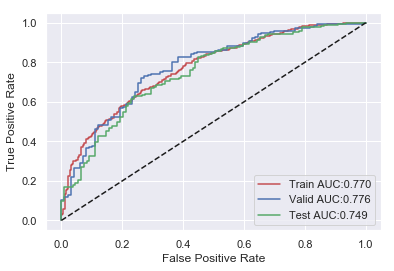

In [1089]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

In this capstone project, we predict will a critically ill patient who undergoes a right heart catheterization (RHC) die during the procedure. We trained seven models and analyzed the performance. 

Based on the test dataset of the final optimized model, 75 percent of our best model is able to differentiate between classes. Our model would catch 69 percent of the death rate when we use a threshold of 0.5. 

Based on the Lift ratio, we would perform 1.2 times better than randomly guessing. That means we are able to capture 1.2 times more patients compared to picking the same number of patients randomly.